# 6.5.2 SVC (Support Vector Classifier)

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

## 6.5.2.1 Función de riesgo

La estimación de los parámetros del modelo y la correspondiente selección de los vectores de soporte se realiza mediante la minimización de la función de riesgo regularizado de la forma:

$$ R(C,\epsilon) = C \sum_{i}^{} loss(d_i, y_i) + \sum_{d}^{} w^2_d $$

La función de pérdida utilizada depende del tipo de implementación. <br>
El término

$$ K(x_i, x_j) = \phi(x_i)^T \phi(x_j) $$

donde $\delta(.)$ es una función kernel, y el término anterior corresponde al Kernel Trick.

## 6.5.2.2 Estimación de parámetros

Sea un conjunto de patrones de entrenamiento $x_i \epsilon R_p$, $i = 1, …, n$, y $y_i$ la variable dependiente con $y \ \epsilon \ \{−1, +1\}$, el objetivo es encontrar $w \ \epsilon \ R_p$ y $b \ \epsilon R$, tal que la ecuación anterior sea correcta para la mayor cantidad de patrones.

Para la clasificación, esto equivale a resolver el problema primal:

$$ min_{w,b,\zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i $$

sujeto a:

$ y_i(w^T \phi(x_i) + b) ≥ 1 -\zeta_i $ <br>
$ \zeta_i ≥ 0 $ <br>
$ i = 1, ..., n $ <br>

Una explicación intuitiva es la siguiente:

Para llegar al óptimo se debe minimizar $0.5 w^T w$, es decir, se desean llevar los coeficientes a cero. <br>
$w^T \phi(x_i) + b$ es la frontera de decisión entre las clases. <br>
Si un patrón es correctamente clasificado, entonces $\zeta = 0$. <br>
Si un patrón es mal clasificado, $\zeta > 0$ haciendo crecer el segundo término de la función objetivo.

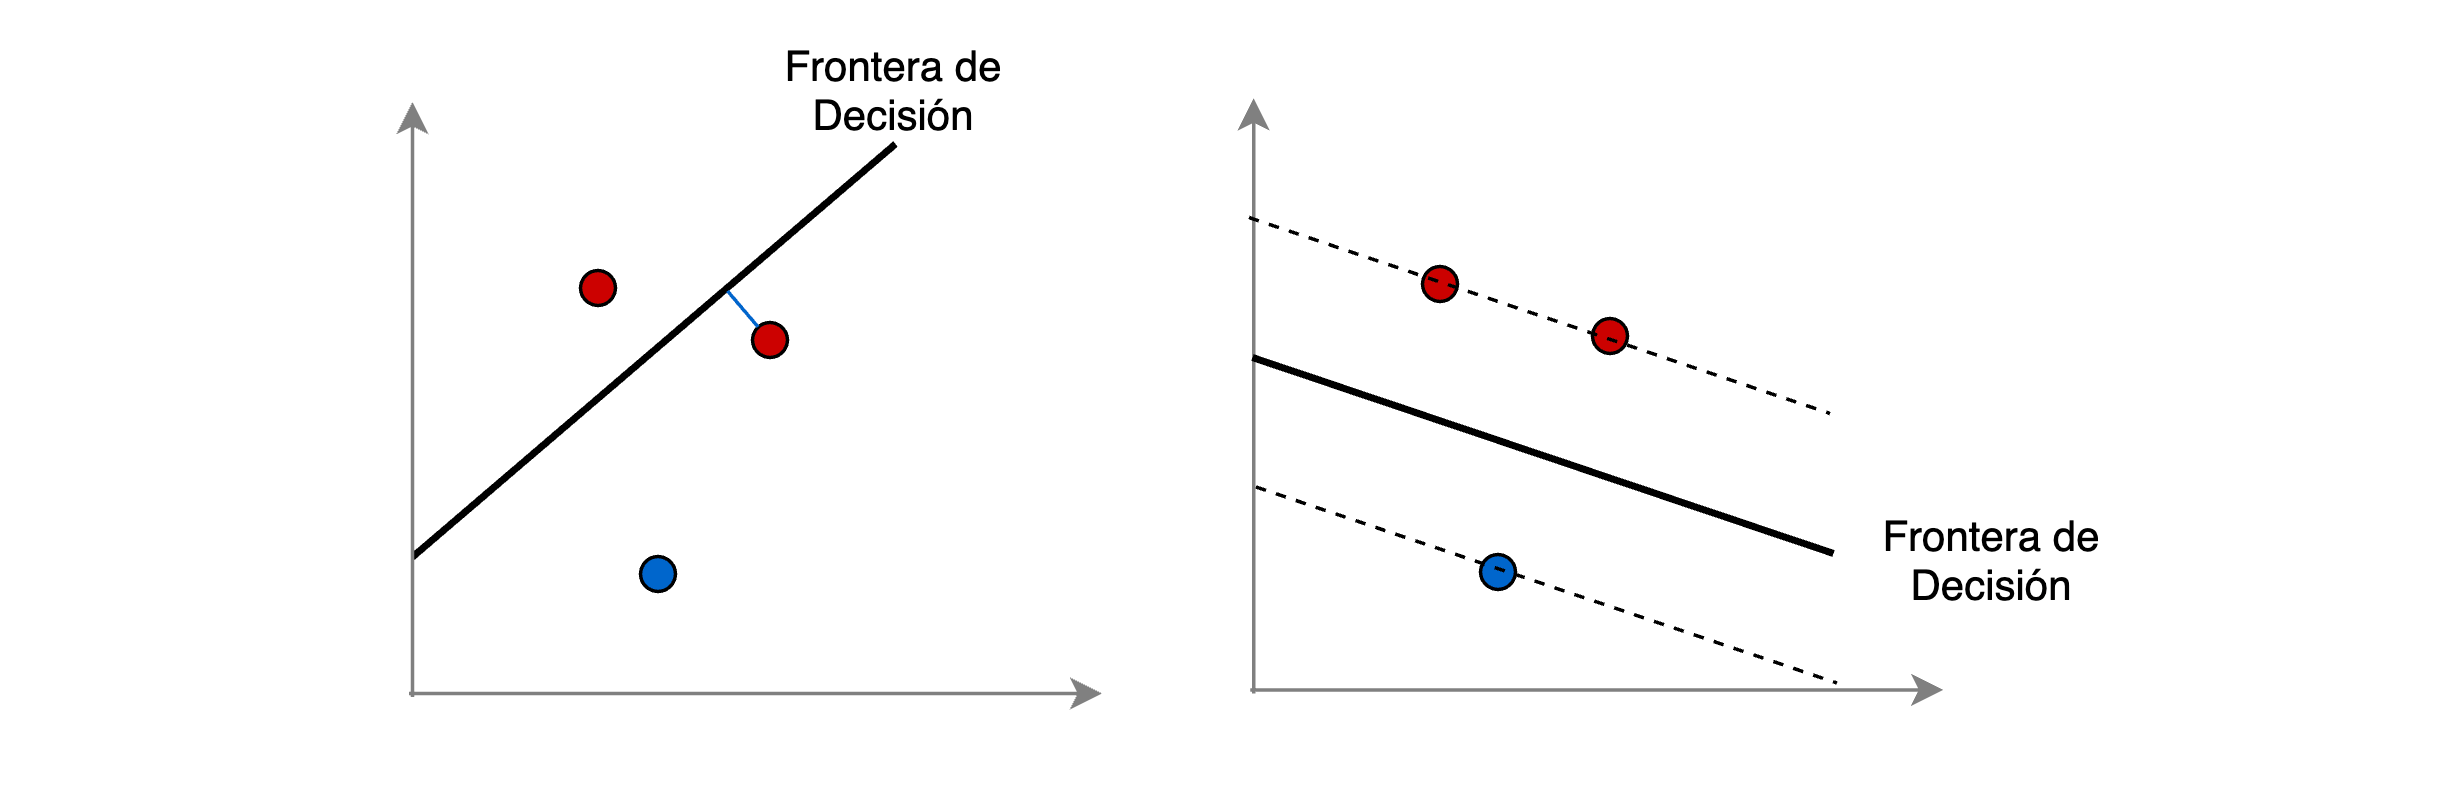

El parámetro $C$ controla la fuerza de la penalización, y como resultado, actua como el inverso de un parámetro de regularización.

## 6.5.2.3 Problema dual

El problema dual del primal es:

$$ min_{\alpha} \frac{1}{2}\alpha^T Q \alpha - \exp^T \alpha $$

sujeto a:

$ y^T \alpha = 0 $ <br>
$ 0 \leq \alpha_i \leq C $ <br> 
$ i = 1, …, n$

donde:

- $e$ es un vector de unos. <br> 
- $Q$ es una matriz semidefinida positiva de $n×n$. <br> 
- $Q_{ij} = y_i y_j K(x_i, x_j)$ <br> 
- $K(x_i,x_j) = \phi(xi)^T\phi(xj) $ <br> 
- $\alpha_i$ son los coeficientes duales <br> 

## 6.5.2.4 Frontera de decisión

Una vez el problema de optimización ha sido resuelto, la función de decisión se computa para una muestra $x$ como:

$$ \sum_{i \ in \ SV}^{} y_i \alpha_i K (x_i, x)+b $$ 

In [9]:
NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

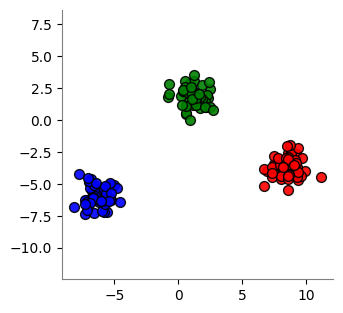

In [10]:
plt.figure(figsize=(3.5, 3.5))
plt.scatter(X[:50, 0], X[:50, 1], color="red", edgecolors="black", alpha=0.9, s=50)
plt.scatter(
    X[50:100, 0], X[50:100, 1], color="blue", edgecolors="black", alpha=0.9, s=50
)
plt.scatter(X[100:, 0], X[100:, 1], color="green", edgecolors="black", alpha=0.9, s=50)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

In [11]:
svc = SVC(
    # --------------------------------------------------------------------------
    # Regularization parameter. The strength of the regularization is inversely
    # proportional to C. Must be strictly positive. The penalty is a squared l2
    # penalty.
    C=1,
    # --------------------------------------------------------------------------
    # Specifies the kernel type to be used in the algorithm. If none is given,
    # ‘rbf’ will be used.
    kernel="linear",
    # --------------------------------------------------------------------------
    # Degree of the polynomial kernel function (‘poly’). Must be non-negative.
    # Ignored by all other kernels.
    degree=3,
    # --------------------------------------------------------------------------
    # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    # * if gamma='scale' (default) is passed then it uses
    #   1 / (n_features * X.var()) as value of gamma,
    # * if ‘auto’, uses 1 / n_features
    # * if float, must be non-negative.
    gamma="scale",
    # --------------------------------------------------------------------------
    # Independent term in kernel function. It is only significant in ‘poly’ and
    # ‘sigmoid’.
    coef0=0.0,
    # --------------------------------------------------------------------------
    # Whether to enable probability estimates. This must be enabled prior to
    # calling fit, will slow down that method as it internally uses 5-fold
    # cross-validation, and predict_proba may be inconsistent with predict.
    probability=False,
    # --------------------------------------------------------------------------
    # Tolerance for stopping criterion.
    tol=1e-3,
    # --------------------------------------------------------------------------
    # Set the parameter C of class i to class_weight[i]*C for SVC. If not
    # given, all classes are supposed to have weight one. The “balanced” mode
    # uses the values of y to automatically adjust weights inversely
    # proportional to class frequencies in the input data as
    # n_samples / (n_classes * np.bincount(y)).
    class_weight=None,
    # --------------------------------------------------------------------------
    # Hard limit on iterations within solver, or -1 for no limit.
    max_iter=-1,
    # --------------------------------------------------------------------------
    # Whether to return a one-vs-rest (‘ovr’) decision function of shape
    # (n_samples, n_classes) as all other classifiers, or the original
    # one-vs-one (‘ovo’) decision function of libsvm which has shape
    # (n_samples, n_classes * (n_classes - 1) / 2). However, note that
    # internally, one-vs-one (‘ovo’) is always used as a multi-class strategy
    # to train models; an ovr matrix is only constructed from the ovo matrix.
    # The parameter is ignored for binary classification.
    decision_function_shape="ovr",
    # --------------------------------------------------------------------------
    # Controls the pseudo random number generation for shuffling the data for
    # probability estimates. Ignored when probability is False. Pass an int
    # for reproducible output across multiple function calls.
    random_state=None,
)

svc.fit(X, d)
svc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

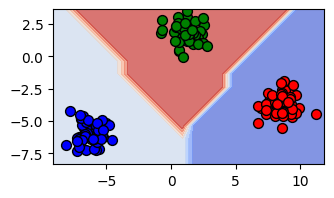

In [12]:
plt.figure(figsize=(3.5, 3.5))

xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 1),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 1),
)

zz = svc.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X[:50, 0], X[:50, 1], color="red", edgecolors="black", alpha=1.0, s=50)
plt.scatter(
    X[50:100, 0], X[50:100, 1], color="blue", edgecolors="black", alpha=1.0, s=50
)
plt.scatter(X[100:, 0], X[100:, 1], color="green", edgecolors="black", alpha=1.0, s=50)

plt.gca().set_aspect("equal", adjustable="box")
plt.gca().set_xlim(xx.min(), xx.max())
plt.gca().set_ylim(yy.min(), yy.max())


plt.show()

In [13]:
print('ok_')

ok_
